<a href="https://colab.research.google.com/github/Varun-531/FML/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [18]:
data = pd.read_csv("/content/drive/MyDrive/Datasets/Company_data.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


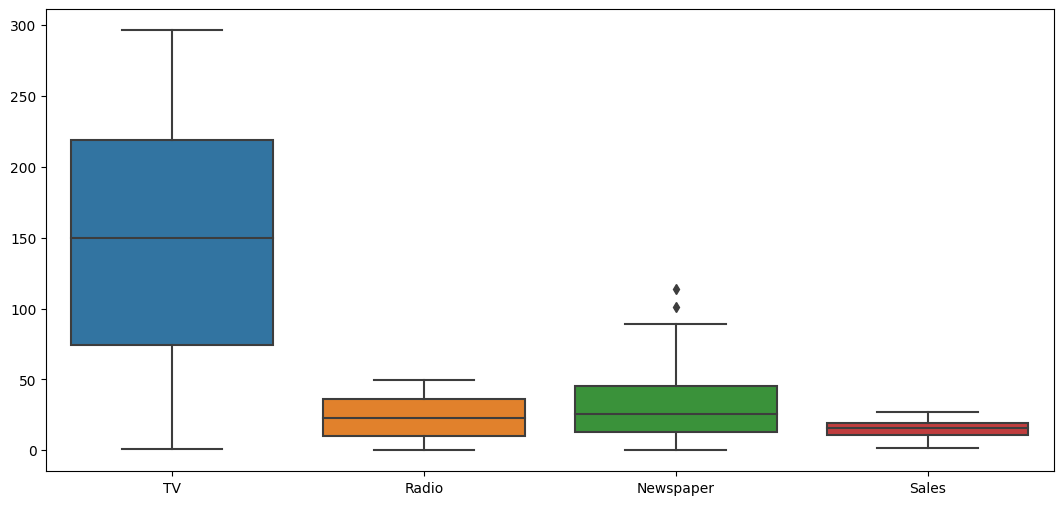

In [4]:
plt.figure(figsize=(13,6))
sns.boxplot(data=data)
plt.show()


In [5]:
q1 = data['Newspaper'].quantile(0.25)
q3 = data['Newspaper'].quantile(0.75)
iqr = q3- q1
print(iqr)


32.35


In [6]:
up = q3+iqr*1.5
down = q1-iqr*1.5
print(up, down)

93.625 -35.775000000000006


In [7]:
Outlier = []
Newspaper = data['Newspaper']

for i in Newspaper :
  if i>up:
    Outlier.append(i)
    print("Up Outlier : " , i)
  if i<down:
    Outlier.append(i)
    print("Down Outlier : " , i)

Up Outlier :  114.0
Up Outlier :  100.9


In [9]:
data["Newspaper"] = data["Newspaper"].replace(Outlier,data["Newspaper"].mean())

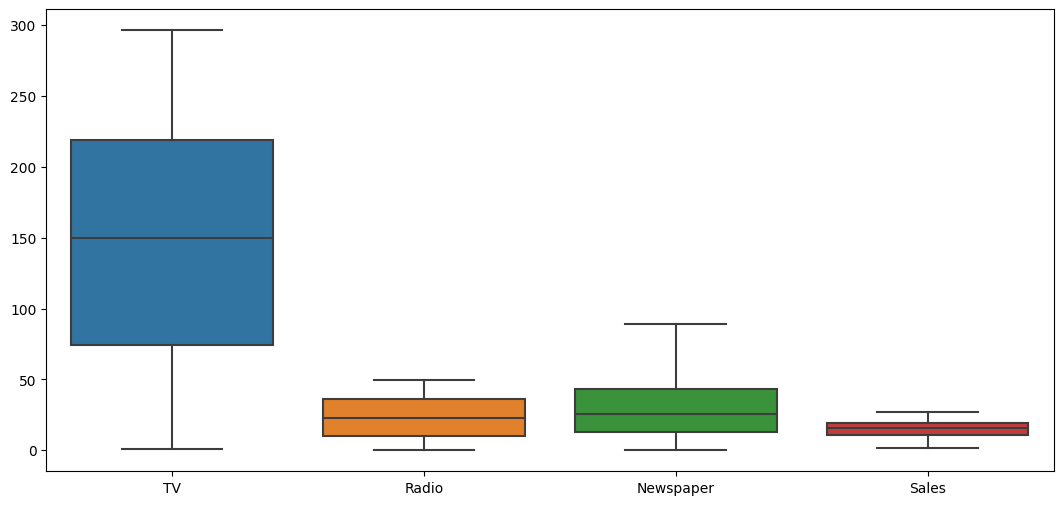

In [11]:
plt.figure(figsize=(13,6))
sns.boxplot(data=data)
plt.show()

In [13]:
X = data.drop('Sales',axis=1).values
Y = data['Sales'].values


In [14]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.049440,0.901208
Radio,0.054809,1.000000,0.345313,0.349631
Newspaper,0.049440,0.345313,1.000000,0.150855
Sales,0.901208,0.349631,0.150855,1.000000


In [15]:
X_tv = X[:,0]

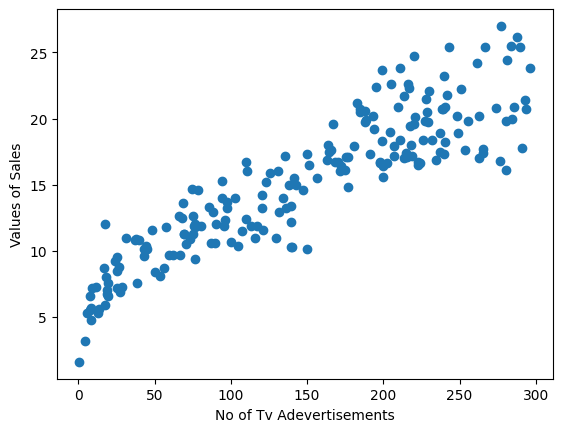

In [20]:
plt.scatter(X_tv,Y)
plt.xlabel('No of Tv Adevertisements')
plt.ylabel('Values of Sales')
plt.show()

In [21]:
X_tv = X_tv.reshape(-1,1)
Y = Y.reshape(-1, 1)

In [22]:
from sklearn.model_selection import train_test_split


In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X_tv,Y,test_size=0.2,random_state=42)

In [25]:
X_train.shape , X_test.shape

((160, 1), (40, 1))

In [26]:
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [27]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [37]:
Y1_predict = reg.predict(X_train)
print("Performance of training data\n")
print(f'MAE = {mean_absolute_error(Y_train,Y1_predict)}')
print(f'MSE = {mean_squared_error(Y_train,Y1_predict)}')
print(f'R_2 = {r2_score(Y_train,Y1_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_train,Y1_predict))}')

Performance of training data

MAE = 1.8005092256620792
MSE = 4.998442356450173
R_2 = 0.8134866044709264
RMSE = 2.235719650683013


In [39]:
Y2_predict = reg.predict(X_test)
print("Performance of testing data\n")
print(f'MAE = {mean_absolute_error(Y_test,Y2_predict)}')
print(f'MSE = {mean_squared_error(Y_test,Y2_predict)}')
print(f'R_2 = {r2_score(Y_test,Y2_predict)}')
print(f'RMSE = {np.sqrt(mean_squared_error(Y_test,Y2_predict))}')

Performance of testing data

MAE = 1.9502948931650088
MSE = 6.101072906773963
R_2 = 0.802561303423698
RMSE = 2.470035001123256
